# 200_YouTube_Results


## Purpose

In this notebook we will share the results we found about the correlations between a movies trailer success and a movies actual success. We will show our key findings and the main ideas we took away from the project.

## Datasets

 - Input: movieTrailers.pkl
 - Output: n/a

In [1]:
import json#for decoding a JSON response
import pandas as pd
import seaborn as sns
import jellyfish
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movieTrailers = pd.read_pickle('../../data/final/movieTrailers.pkl')

# A poor representation

The first aspect to discuss is the fact that it is possible to get terrible correlations in the analysis of a trailers success and a movies success. We can see this clearly when we examine the results we received from comparing the average comments a trailer received. While on the surface it seems like a good measure to use, as seeing comments on a video would be seen as interaction with the trailer, this was not the case. As we can see below using a simple measure such as this gives an inaccurate reflection of a movies success. It shows as the bars in the graph don't follow any order, by simply taking the number of comments it does not reflect the reason for the comments and so a bad trailer could receive as many negative comments as a good trailer would recieve positive.

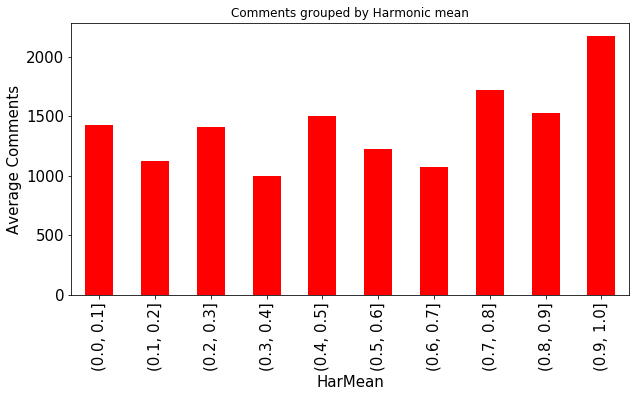

In [3]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['Comments'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average Comments',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.bar(figsize=(10,5),title='Comments grouped by Harmonic mean',fontsize=15,color='red')

An examination of the Pearson mean of this graph shows us just that. There is almost no correlation at all with the number of comments a trailer recieved and the harmonic mean rating the movie received. The correlation is essentially a zero-correlation showing that there is no correlation to be found. We received similar results for the other singular measurements that we had such as likes and views, therefore we came to the conclusion that this method of comparison was insufficient.

In [4]:
movieTrailers['HarMean'].corr(movieTrailers['Comments'],'pearson')

0.06883249693567288

# The benefit of a ratio 

When we look at the distribution of like on trailers over the year we can see that the channel growth has a serious effect on the number of likes that trailers receive. As the years progress we see a sizable increase in the number of likes videos receive on average.

Text(0.5,0,'Year')

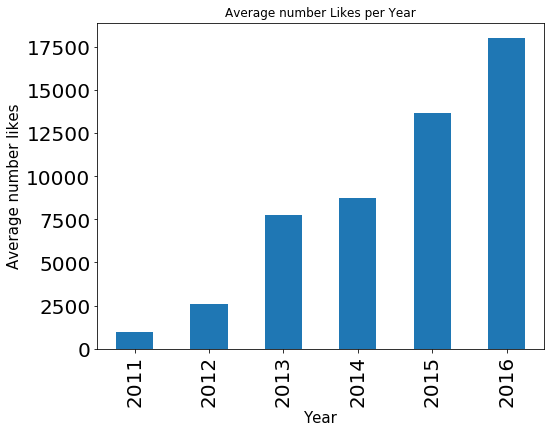

In [5]:
movieTrailers.groupby('year')['Likes'].mean().plot.bar(fontsize=20,use_index=True,figsize=(8,6),title='Average number Likes per Year')
plt.ylabel('Average number likes',size=15)
#plt.title()
plt.xlabel('Year',size=15)

We are able to negate this effect using ratios as we can clearly see the like to dislike ratio is much more balanced and so should give us a much better reading.

Text(0.5,0,'Year')

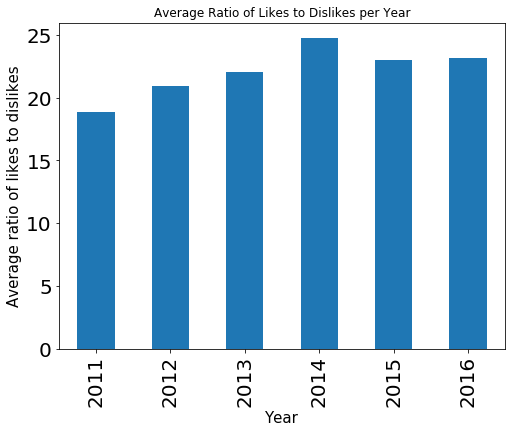

In [6]:
movieTrailers.groupby('year')['likes/dislikes'].mean().plot.bar(fontsize=20,use_index=True,figsize=(8,6),title='Average Ratio of Likes to Dislikes per Year')
plt.ylabel('Average ratio of likes to dislikes',size=15)
#plt.title()
plt.xlabel('Year',size=15)

Once we realised that using a single value as a measurement was not enough we began to consider alternate options. What we came up with was to use ratios as our new measurements and in this way, we would be able to better represent the interaction with the trailer. By using a ratio, we could compare two different pieces of information about a trailer and then compare that to the harmonic mean.

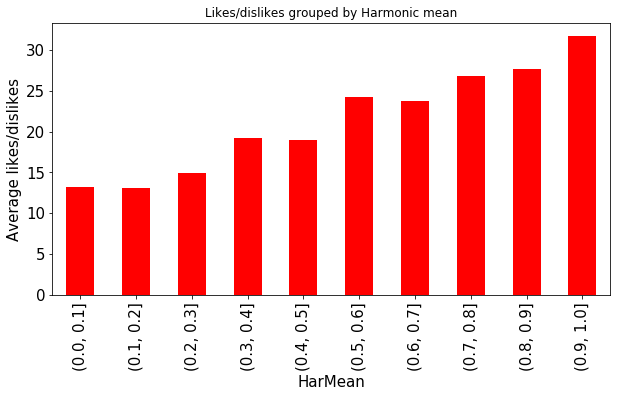

In [7]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['likes/dislikes'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average likes/dislikes',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.bar(figsize=(10,5),title='Likes/dislikes grouped by Harmonic mean',fontsize=15,color='red')

The best correlation we could find was that of the like to dislike ratio. The ratio showed us the number of likes a video received for every dislike. We can clearly see that the graph trends upwards, as the number of likes to dislikes increases so too does the value of the Harmonic mean. Once we analyse the correlation coefficient we can see that the correlation is still considered weak as it only lies around 0.36, however when we consider the spearman correlation we see slightly better results with the correlation coming in at around 0.39.

In [8]:
movieTrailers['HarMean'].corr(movieTrailers['likes/dislikes'],'pearson')

0.3651497098828634

In [9]:
movieTrailers['HarMean'].corr(movieTrailers['likes/dislikes'],'spearman')

0.3986338532889026

Despite this we would still not be able to reliably use this measurement to gauge a movies success as the correlation is just not strong enough to accurately represent the results.

The graph below shows the Average views videos in the harmonic mean receive, what’s interesting about this graph is that is shows us an unusual trend in that the average views are highest at the ends of the scale. The average number of views is actually higher for movies that are at the lowest end of the harmonic mean. This alludes to an interesting idea that we are drawn toa poor trailer, perhaps a bad trailer is spread faster we are more eager to make fun of a terrible trailer than enjoy a well-made trailer.


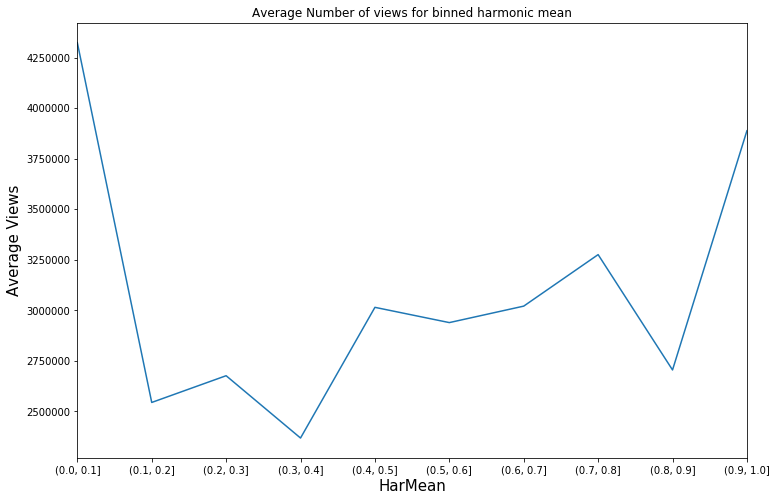

In [10]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut( movieTrailers['HarMean'], bins=bins))['Views'].mean()
plt.xlabel('Year',size=15)
plt.ylabel('Average Views',size=15)
plt.xlabel('Binned Scores',size=15)
df.plot(figsize=(12,8),title= 'Average Number of views for binned harmonic mean')

# Conclusion 


The key finding that we found in our exploration and analysis of this data was that it proved to be quite difficult to try and correlate movie success to trailer success. While using ratios helped, the correlation was still too weak to be considered significant. We also found some unusual trends in the ways that views were distributed across the harmonic mean with the highest views being received for the least successful movies.